In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

def generateMissingValues(df, missingRate):
    df = df.mask(np.random.random(df.shape) < missingRate)
    return df

IN_COLAB = 'google.colab' in str(get_ipython())

if IN_COLAB:
    !wget https://raw.githubusercontent.com/AkeemSemper/Intro_to_Machine_Learning_Student_Workbooks/main/data/CarPrice_Assignment.csv
    !wget https://raw.githubusercontent.com/AkeemSemper/Intro_to_Machine_Learning_Student_Workbooks/main/data/heart.csv
    df_car = pd.read_csv('CarPrice_Assignment.csv')
    df_heart = pd.read_csv('heart.csv')
else:
    df_car = pd.read_csv('../data/CarPrice_Assignment.csv')
    df_heart = pd.read_csv('../data/heart.csv')
df_heart.rename(columns={'HeartDisease': 'target'}, inplace=True)
df_car.rename(columns={'citympg': 'target'}, inplace=True)
df_car.drop(['highwaympg'], axis=1, inplace=True)
df_heart = generateMissingValues(df_heart, 0.05)
df_car = generateMissingValues(df_car, 0.05)
df_heart = df_heart.dropna(subset=['target'])
df_car = df_car.dropna(subset=['target'])

# Regression Review Exercises

## Linear Regression, Logistic Regression, and SKlearn Basics

Below is a quick review of the core steps that we need to create linear or logistic regression models using sklearn. At the bottom of the page are a couple of exercises to work through as practice. 

### What do Models Learn?

In the training process, i.e. the fit() step, the model is learning the parameters - in a regression these are all the slopes and the intercept. These parameters will be different for every different type of model, and are often referred to as the model's coefficients or its weights. The important thing is that once the model has a set of weights determined, that is all it needs to make predictions. In a linear regression, once the model learns the weights, it only needs an input - a set of X values (features) - to make a prediction.

### Data Exploration

Our first step is to load the data and explore it. We can look at things both numerically and graphically.

A few things that we look for when exploring the data include:
<ul>
    <li> Missing values </li>
    <li> Outliers </li>
    <li> Distribution of the data </li>
    <li> Relationships between variables </li>
    <li> Data types </li>
    <li> Errors/typos/mistakes </li>
</ul>

The details of what we need to look for and what we do with that information will vary depending on the data and the scenario. For now, the most important things are identifying data types, to allow for prep such as scaling and encoding, as well as identifying missing values and outliers. It is reasonably likely that we may need to come back and revisit the exploration again as we progress. 

#### Numerical Exploration

Exploring the data numerically can be done with the describe and info methods. The describe method will give us a summary of the numerical columns, while the info method will give us a summary of all columns along with their type. 

#### Graphical Exploration

We can also explore the data graphically. This can be done with histograms, boxplots, scatter plots, and more. We normally use the seaborn library for this, but there are many other libraries that do the same thing. 

For numerical data, histograms that show distributions and scatter plots that show relationships are often useful. The pairplot can give us a quick plot of all numerical values against each other to see this information. 

For categorical data, we are generally interested in the counts of each category. This can be done with a countplot or a boxplot. 

<b>Note:</b> if datasets are large, it is often useful to sample the data for the graphical exploration. This can be done with the .sample() method.

### Initial Cleanup

Once we have explored the data, we can start to clean it up. This may include things like:
<ul>
    <li> Handling missing values </li>
    <li> Handling outliers </li>
    <li> Encoding categorical variables </li>
    <li> Scaling the data </li>
</ul>

Many of these steps are more easily dealt with by using a step in the pipeline. There are a few things that we may want to do first though. For example, we can filter out outliers and drop columns that we won't use. This may be a multi-step process, where we make some changes, explore the data again, and then make more changes again. For example, if we remove outliers we may see new outliers emerge with the range changing. 

<b>Note:</b> it is possible to do all of this in a pipeline, but it is more simple (for now) to do these steps separately. 

In [2]:
#

### Data Pipeline Toolkit

There are several tools that we use near-universally in the data preparation stages for both regression and classification problems. These include:
<ul>
<li> Pipelines </li>
<li> ColumnTransformer </li>
<li> Train-Test Split or Cross-Validation </li>
<li> GridSearchCV </li>
<li> Scaling </li>
<li> One-Hot Encoding (or label encoding, but that's more rare) </li>
    <ul>
    <li> <b>Note:</b> if you use Label Encoding, you want to have scaling after that step in the pipeline. The labels will be 1,2,3,4...., so we want to ensure they don't end up having a larger range than data that has been scaled or one-hot encoded.</li>
    </ul>
<li> Imputation </li>
</ul>

These tools are used in both regression and classification problems, and are often used in the same way. We need to prepare our data in the same way for either. We can do whatever cleanup is needed from the exploration as well as prepare the data for its use in the model.
<b>Note:</b> when using a pipeline we generally don't need to put the data into arrays before, the pipeline will handle that for us.

In [3]:
#

### More Aggressive Modifications

We can also go beyond some basic data cleanup steps like removing outliers. We can also transform the data in more aggressive ways. For example, we can create new features by combining existing ones, or we can transform the data to make it more normally distributed. 

Some common actions include:
<ul>
    <li> Log transformations </li>
    <li> Binning </li>
</ul>

These transformations can be done in a pipeline, but they are often done before the pipeline. They are also often done after the initial exploration and cleanup. Creating these types of transformations on the data isn't something that is required, and it is something that becomes more relevant as you build comfort. For now, we don't need to get hung up on figuring out how to change the data with transformations, we can look to see if anything looks like it might apply, and once we have things working 'normally' we can run another trial with our changes and see if that made an impact.

In [4]:
#

#### Example - Transformations

We can use these transformations to make the data more normally distributed, which will generally, but not always, lead to better model performance. The actions needed to do this are pretty simple, we just add a step to the preparation that does something like a log transformation to the original data, and uses that instead. 

<Axes: ylabel='Count'>

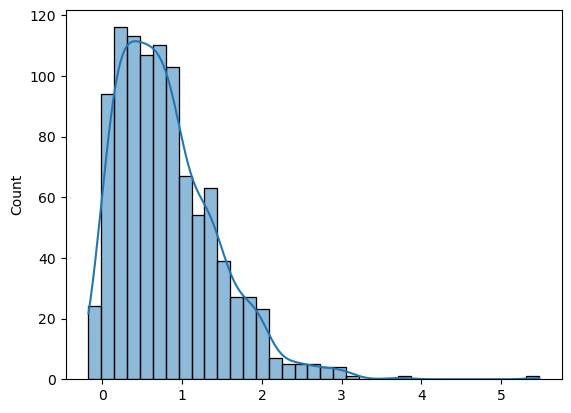

In [5]:
import scipy

skew_data = scipy.stats.skewnorm.rvs(10, size=1000)
sns.histplot(skew_data, kde=True)

<Axes: ylabel='Count'>

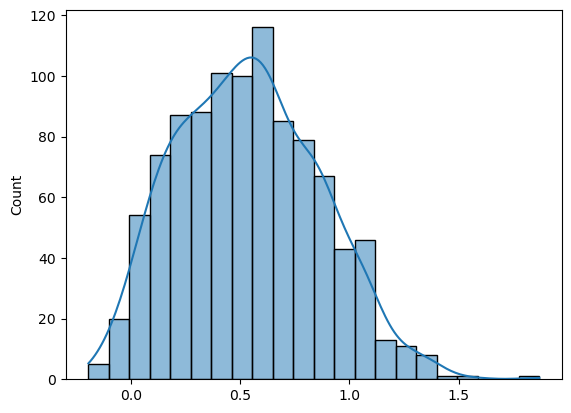

In [6]:
sns.histplot(np.log1p(skew_data), kde=True)

##### Binning

If we have clear divisions in the data, we can use binning to create a new categorical variable. For example, if we have a variable that is a count of something, we can create bins for low, medium, and high counts. This is most beneficial when the relationship between the target and the variable is not linear - i.e. there are 'levels' or tiers of the variable that have different impacts on the target. Think about marginal tax rates - the amount of tax applied to the next dollar of income changes from step to step.

There are several ways to do this, including the cut method in pandas, or the KBinsDiscretizer in sklearn. For simple examples, we can just use simple conditions to construct a new feature, then remove the old one (or ignore it) after we are done. 

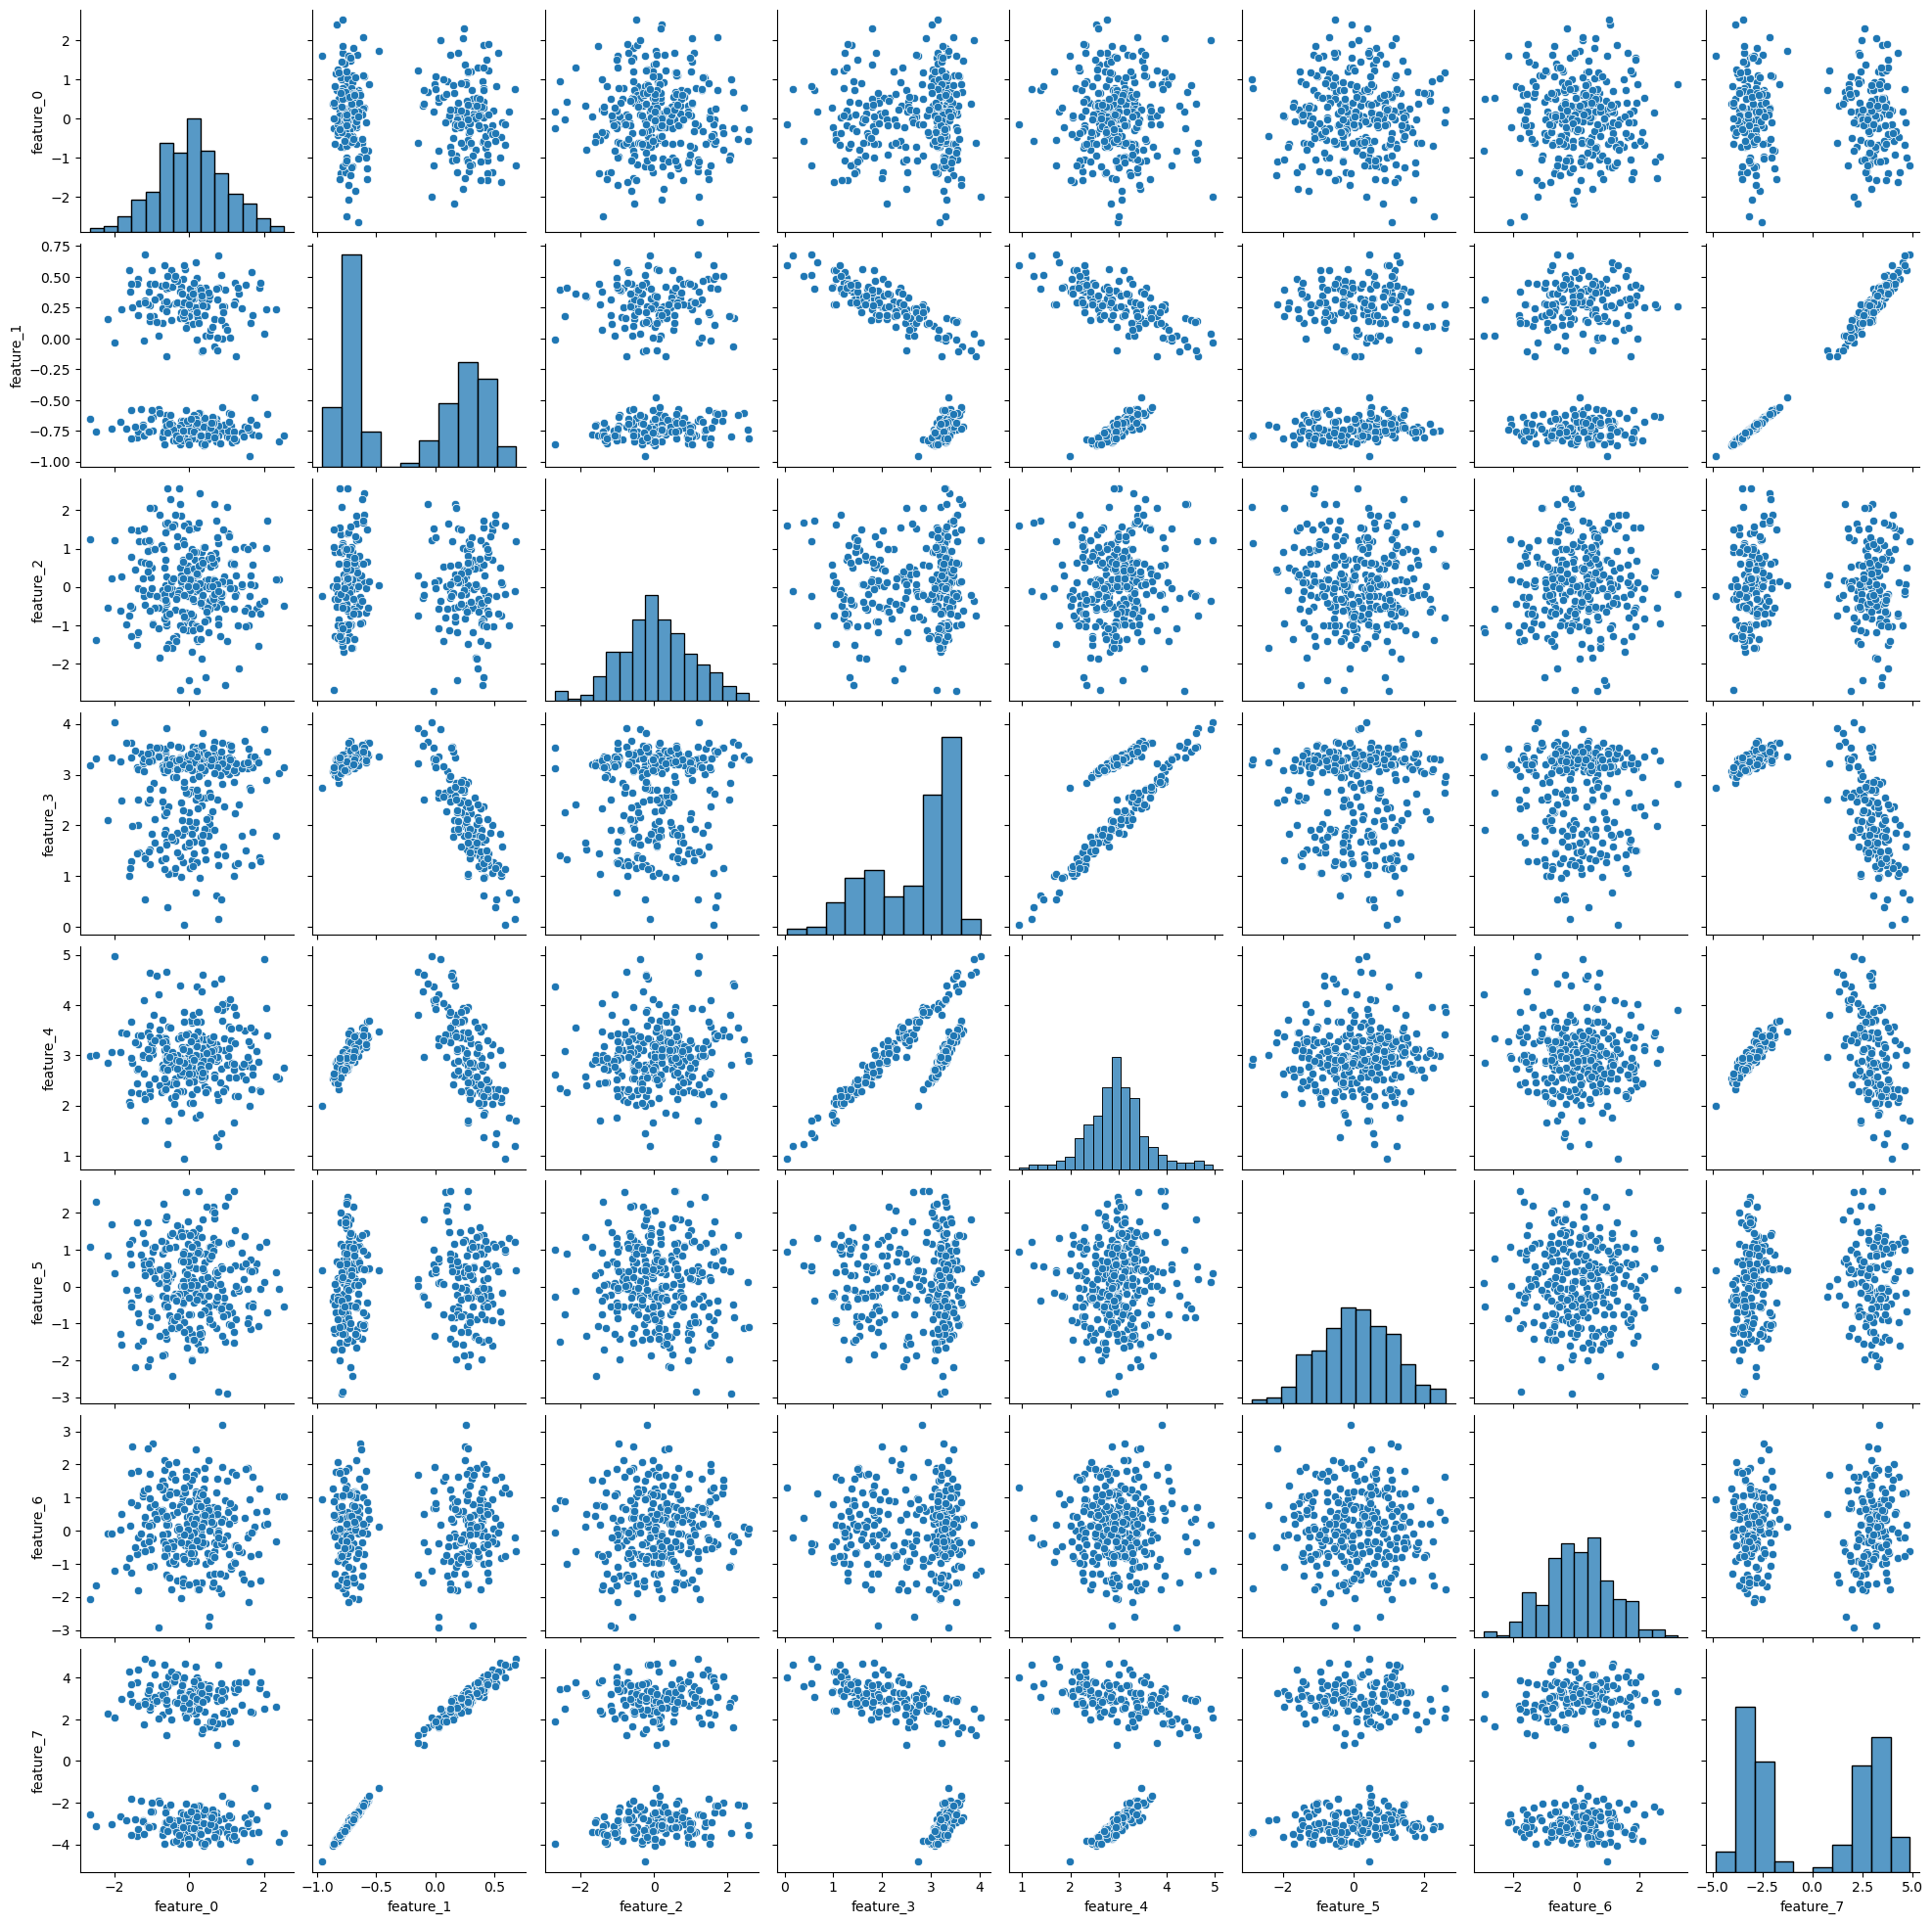

In [7]:
from sklearn.datasets import make_classification
n_feat = 8
X_example, y_example = make_classification(n_samples=300, n_features=n_feat, n_classes=2, random_state=42, n_clusters_per_class=1, class_sep=3)
df_example = pd.DataFrame(X_example, columns=[f'feature_{i}' for i in range(n_feat)])
sns.pairplot(df_example)

False    150
True     150
Name: feature_7_binned, dtype: int64


<Axes: xlabel='feature_7', ylabel='Count'>

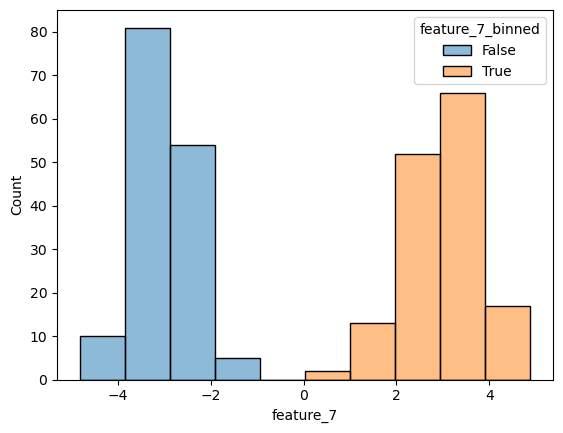

In [8]:
df_example['feature_7_binned'] = df_example['feature_7'] > 0
print(df_example['feature_7_binned'].value_counts())
sns.histplot(data=df_example, x='feature_7', hue='feature_7_binned')

## Regression (Predicting a Number)

Regression problems are defined by their target - a number. 

In [9]:
#

#### Evaluating Regression Models

There are two main metrics that we use to evaluate regression models: mean squared error and r-squared. Mean squared error is a measure of the average squared difference between the actual and predicted values; the mean squared error is often expressed as the RMSE - the root mean squared error, which is in the same terms as the original target. R-squared is a measure of how much of the variance in the target variable is explained by the model. The two metrics are related, but they are not the same.

The score function returns the r-squared value, which is between 0 and 1, making it a bit easier to interpret and compare.

Core metrics:
<ul>
    <li> mean_squared_error </li>
    <li> r2_score </li>
</ul>

Other tools:
<ul>
    <li> cross_val_score </li>
</ul>


## Classification (Predicting a Category - True/False, Yes/No, etc.)

Classification problems are defined by their target - a category (T/F for now). 

In [10]:
#

#### Evaluating Classification Models

There are several metrics, and other tools, that we use to evaluate classification models. The most simple is accuracy - the proportion of correct predictions. We generally want to look at the confusion matrix as well, which will give us an idea of the types of errors that the model is making - false positives or false negatives. If we are in a scenario where one of these types of errors is more costly than the other, we may want to use a different metric such as precision or recall.

Core metrics:
<ul>
    <li> Accuracy </li>
    <li> Precision </li>
    <li> Recall </li>
    <li> F1 Score </li>
</ul>

Other tools:
<ul>
    <li> Confusion Matrix </li>
    <li> ROC Curve </li>
    <li> AUC </li>
</ul>

## Exercise - Regression

Predict the target (miles per gallon of fuel consumption) using the other features in the dataset.
<ul>
<li> You may need to do some cleanup of the data - those steps are open ended. </li>
<li> Try some tuning - use different HP values and see if you can improve the model. If you feel ok, try some other changes - use a different model or try to remove or modify some features. </li>
</ul>

#### Numerical Exploration

In [11]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,target,price
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,13495.0
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130.0,mpfi,3.47,NaN,9.0,111.0,5000.0,21.0,16500.0
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,NaN,hatchback,rwd,front,94.5,...,NaN,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,16500.0
3,4.0,2.0,audi 100 ls,gas,std,four,sedan,NaN,front,99.8,...,four,109.0,mpfi,3.19,3.40,10.0,NaN,5500.0,24.0,13950.0
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,17450.0


##### Graphical Exploration

In [12]:
#

#### Cleanup and Process Data

#### Model

In [13]:
# Notes:
# I did this one without a grid search. That's mainly to have an example of both.


### Result Analysis

<b>Try to draw some conclusions based on what you see in the model above.</b>
<ul>
<li>Is the model good? </li>
<li>Are they any things that you can see/think of that might help improve the model? </li>
<li>Is the data 'good' - do we have enough? Is it too noisy? </li>
</ul>

These things don't generally have one correct answer, but are more about thinking critically about the model and the data.

In [14]:
#

#### With Data Changes

Create another model, but use some more aggressive work on the features. 

In [15]:
#

## Exercise - Classification

Classification Exercise - Predict the target (1/0):
<ul>
<li> You may need to do some cleanup of the data - those steps are open ended. </li>
<li> Try some tuning - use different HP values and see if you can improve the model. If you feel ok, try some other changes - use a different model or try to remove or modify some features. </li>
</ul>

#### Numerical Exploration

In [16]:
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,NaN,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


#### Graphical Exploration

In [17]:
#

#### Data Preparation for Modelling

In [18]:
#

#### Modelling

In [19]:
#

### Result Analysis

<b>Try to draw some conclusions based on what you see in the model above.</b>
<ul>
<li>Is the model good? </li>
<li>Are they any things that you can see/think of that might help improve the model? </li>
<li>Is the data 'good' - do we have enough? Is it too noisy? </li>
</ul>

These things don't generally have one correct answer, but are more about thinking critically about the model and the data.

In [20]:
#

#### With Feature Transformations

Create another model, but use some more aggressive work on the features. 